In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pickle
import pandas as pd
from sklearn import metrics

In [37]:
SIBI_Lang = pd.read_csv('C:/Users/User/Documents/SIBI_Lang/SIBI_Lang_Spatio.csv')
SIBI_Lang.head()

,x_0_1,x_1_1,x_2_1,x_3_1,x_4_1,x_5_1,x_6_1,x_7_1,x_8_1,x_9_1,...,y_12_5,y_13_5,y_14_5,y_15_5,y_16_5,y_17_5,y_18_5,y_19_5,y_20_5,classes
0,320.0,381.423419,391.045247,349.580764,287.960961,272.265944,230.349107,232.077926,238.834744,198.587525,...,519.698047,568.031062,636.903049,553.747835,524.197339,563.136134,605.462246,541.247527,514.452808,A
1,320.0,185.304755,83.601874,43.183010,0.000000,113.022928,87.724511,99.836638,120.638026,196.071289,...,518.532944,566.282913,636.727460,549.910960,524.518541,563.236407,605.884747,540.300724,517.247651,A
2,320.0,175.455586,81.299971,41.078281,0.000000,118.969897,91.991808,104.022066,118.800421,190.166669,...,513.674675,566.934436,635.250632,545.657832,516.268838,564.266435,605.407846,537.078887,511.235734,A
3,320.0,175.404958,78.035548,40.300851,0.000000,110.859635,87.152357,96.557155,113.904619,184.708936,...,518.201941,567.859636,634.608324,553.613673,520.148519,562.937018,604.736421,540.971826,511.215054,A
4,320.0,180.257889,80.764200,40.504469,0.000000,107.685147,77.569322,91.564090,109.586125,179.553368,...,516.803878,567.202914,635.621705,555.282102,519.388051,562.826704,606.259327,542.414687,510.322156,A


In [38]:
X = SIBI_Lang.values[:,:-1]
X = X.astype('float32')
X

array([[320.      , 381.42343 , 391.04526 , ..., 605.4622  , 541.2475  ,
        514.4528  ],
       [320.      , 185.30475 ,  83.601875, ..., 605.88477 , 540.3007  ,
        517.2477  ],
       [320.      , 175.45558 ,  81.29997 , ..., 605.40784 , 537.07886 ,
        511.23575 ],
       ...,
       [320.      , 211.8564  , 130.93852 , ..., 576.3403  , 585.6245  ,
        576.52783 ],
       [320.      , 213.3492  , 131.46887 , ..., 574.35065 , 584.1758  ,
        575.75635 ],
       [320.      , 211.37312 , 130.6945  , ..., 577.07227 , 586.69696 ,
        578.26746 ]], dtype=float32)

In [39]:
Y = SIBI_Lang.values[:,-1]
Y

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A

In [31]:
from sklearn.preprocessing import LabelEncoder

Y = LabelEncoder().fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [40]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(675, 210) (225, 210) (675,) (225,)


In [41]:
from sklearn.svm import SVC
# membuat model svm
svm_model = SVC(kernel='rbf', C=100, probability=True) 
# melakukan pelatihan model terhadap data
svm_model.fit(X_train, y_train)

SVC(C=100, probability=True)

In [42]:
#accuracy
y_pred = svm_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


d:\anaconda\envs\my_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


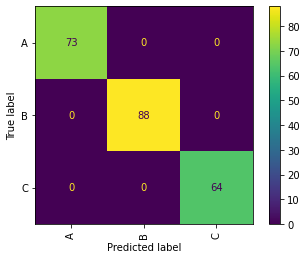

In [43]:
plot_confusion_matrix(svm_model, X_test, y_test, xticks_rotation='vertical', values_format='d')

In [44]:
with open('C:/Users/User/Documents/SIBI_Lang/svm_model.sav',
          'wb') as handle:
    pickle.dump(svm_model, handle)

In [ ]:
# import library and framework
import cv2
import csv
import numpy as np
import mediapipe as mp

In [ ]:
# create object for draw and get hand detection
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

In [ ]:
# Define global variable for hand keypoints data
hand_keypoint_data = np.array([])

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  
  # Read until video is completed
  while cap.isOpened():
    # Capture frame-by-frame
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue
    
    try:
      # To improve performance, optionally mark the image as not writeable to
      # pass by reference.
      image.flags.writeable = False
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      results = hands.process(image)

      # Draw the hand annotations on the image.
      image.flags.writeable = True
      image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
      if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
          mp_drawing.draw_landmarks(
              image,
              hand_landmarks,
              mp_hands.HAND_CONNECTIONS,
              mp_drawing_styles.get_default_hand_landmarks_style(),
              mp_drawing_styles.get_default_hand_connections_style())
      
      # Checking keypoints if complete will do this block of code
      if len(results.multi_hand_landmarks[0].landmark) >= 21:
        # Write spatiodata from hand keypoints coordinate
        if len(hand_keypoint_data) >= 210:
          # Write spatiodata to csv
          with open('C:/Users/User/Documents/SIBI_Lang/contoh.csv', 'a', newline='') as f:
            writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            writer.writerow(hand_keypoint_data)

          # deleted 42 old data 
          deletedIndex = np.arange(42)
          hand_keypoint_data = np.delete(hand_keypoint_data, deletedIndex)

        # define variable for centering and scaling process
        centering = np.array([])
        scaling = np.array([])

        # Centering X coordinate Process
        for indexPoint in range(21):
          centering = np.append(centering, (
            results.multi_hand_landmarks[0].landmark[0].x - results.multi_hand_landmarks[0].landmark[indexPoint].x))

        # Centering Y coordinate Process
        for indexPoint in range(21):
          centering = np.append(centering, (
            results.multi_hand_landmarks[0].landmark[0].y - results.multi_hand_landmarks[0].landmark[indexPoint].y))

        centering = centering.reshape(2, 21)
        
        # Scaling Process
        for indexIter in range(2):
          for jointIter in range(21):
            scaling = np.append(scaling, centering[indexIter][jointIter] / np.max(
              np.absolute(centering[indexIter])) * 320)
        
        # Normalization Process
        for jointIter in range(42):
          hand_keypoint_data = np.append(hand_keypoint_data, (scaling[jointIter] + 320))

    except Exception as e:
      continue

    finally:
      # Flip the image horizontally for a selfie-view display.
      cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
      if cv2.waitKey(5) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [4]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

In [5]:
# For static images:
IMAGE_FILES = "C:/Users/User/Documents/SIBI_Lang/SIBI_Dataset/A/A (3).jpg"
nameFile = 'Z8_Hand_Val.jpg'
cons_width = 480
cons_height = 480

handDirectory = 'C:/Users/User/Documents/SIBI_Lang/SIBI_Hand_Keypoints_Datasets/Validation/Z/'

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:

    image = cv2.imread(IMAGE_FILES)
    image = cv2.resize(image,(cons_height,cons_width))

    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)
      
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    print(results.multi_hand_landmarks[0])
    print(len(results.multi_hand_landmarks[0].landmark))
    # print(results.multi_hand_landmarks[0])
    # print(len(results.multi_hand_landmarks[0]))
    # for i in range(21):
    #   print(results.multi_hand_landmarks[0].landmark[i].y)
      # print(results.multi_hand_landmarks[0].landmark[i].y)
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    # cv2.imwrite(handDirectory + '/' + nameFile, image)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

landmark {
  x: 0.6252521276473999
  y: 0.8524543046951294
  z: -1.0910744094871916e-06
}
landmark {
  x: 0.7156006693840027
  y: 0.7303693890571594
  z: -0.04185602441430092
}
landmark {
  x: 0.7486536502838135
  y: 0.5853216052055359
  z: -0.05634085834026337
}
landmark {
  x: 0.7506906986236572
  y: 0.465568870306015
  z: -0.07353884726762772
}
landmark {
  x: 0.7254118919372559
  y: 0.37583670020103455
  z: -0.08329029381275177
}
landmark {
  x: 0.6708136200904846
  y: 0.5045843720436096
  z: -0.0059251184575259686
}
landmark {
  x: 0.6411837935447693
  y: 0.41999638080596924
  z: -0.07691026479005814
}
landmark {
  x: 0.6417089104652405
  y: 0.5126715302467346
  z: -0.11538483947515488
}
landmark {
  x: 0.649307131767273
  y: 0.5833195447921753
  z: -0.12723834812641144
}
landmark {
  x: 0.5881111025810242
  y: 0.5359805822372437
  z: -0.00955990981310606
}
landmark {
  x: 0.5566605925559998
  y: 0.45851367712020874
  z: -0.08533164113759995
}
landmark {
  x: 0.5836113691329956
  

In [623]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

Default GPU Device:/device:GPU:0


In [3]:
import numpy as np
import csv
hand_keypoint_data = np.array([])

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue
    
    try:
      # To improve performance, optionally mark the image as not writeable to
      # pass by reference.
      image.flags.writeable = False
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      results = hands.process(image)

      # Draw the hand annotations on the image.
      image.flags.writeable = True
      image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
      if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
          mp_drawing.draw_landmarks(
              image,
              hand_landmarks,
              mp_hands.HAND_CONNECTIONS,
              mp_drawing_styles.get_default_hand_landmarks_style(),
              mp_drawing_styles.get_default_hand_connections_style())
      
      # print(len(results.multi_hand_landmarks[0].landmark))
      # print(results.multi_hand_landmarks[0].landmark[0].x)
      
      if len(results.multi_hand_landmarks[0].landmark) >= 21:
        if len(hand_keypoint_data) >= 210:
          with open('C:/Users/User/Documents/SIBI_Lang/sibi_lang.csv', 'a', newline='') as f:
            writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            writer.writerow(hand_keypoint_data)

          deletedIndex = np.arange(21)
          hand_keypoint_data = np.delete(hand_keypoint_data, deletedIndex)
          print(len(hand_keypoint_data))
          print('delete')

        # define variable for centering and scaling process
        centering = np.array([])
        scaling = np.array([])

        # Centering X coordinate Process
        for indexPoint in range(21):
          centering = np.append(centering, (
            results.multi_hand_landmarks[0].landmark[0].x - results.multi_hand_landmarks[0].landmark[indexPoint].x))

        # Centering Y coordinate Process
        for indexPoint in range(21):
          centering = np.append(centering, (
            results.multi_hand_landmarks[0].landmark[0].y - results.multi_hand_landmarks[0].landmark[indexPoint].y))

        centering = centering.reshape(2, 21)
        
        # Scaling Process
        for indexIter in range(2):
          for jointIter in range(21):
            scaling = np.append(scaling, centering[indexIter][jointIter] / np.max(
              np.absolute(centering[indexIter])) * 320)
        
        # Normalization Body Process
        for jointIter in range(42):
          hand_keypoint_data = np.append(hand_keypoint_data, (scaling[jointIter] + 320))

    except Exception as e:
      continue

    finally:
      # Flip the image horizontally for a selfie-view display.
      cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
      
      if cv2.waitKey(5) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()

189
delete
210
delete
231
delete
252
delete
273
delete
294
delete
315
delete
336
delete
357
delete
378
delete
399
delete
420
delete
441
delete
462
delete
483
delete
504
delete
525
delete
546
delete
567
delete
588
delete
609
delete
630
delete
651
delete
672
delete
693
delete
714
delete
735
delete
756
delete
777
delete
798
delete
819
delete
840
delete
861
delete
882
delete
903
delete
924
delete
945
delete
966
delete
987
delete
1008
delete
1029
delete
1050
delete
1071
delete
1092
delete
1113
delete
1134
delete
1155
delete
1176
delete
1197
delete
1218
delete
1239
delete
1260
delete
1281
delete
1302
delete
1323
delete
1344
delete
1365
delete
1386
delete
1407
delete
1428
delete
1449
delete
1470
delete
1491
delete
1512
delete
1533
delete
1554
delete
1575
delete
1596
delete
1617
delete
1638
delete
1659
delete
1680
delete
1701
delete
1722
delete
1743
delete
1764
delete
1785
delete
1806
delete
1827
delete
1848
delete
1869
delete
1890
delete
1911
delete
1932
delete
1953
delete
1974
delete
1995
de